In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2

# SISSA - Language Reading and The Brain - a.y. 2023-24
# Sebastiano Quintavalle - Assignment 1

In [2]:
from os import path
from matplotlib import pyplot as plt
from statistics import median

import words
from settings import DRC_DIR, BINARY, DEFAULT_PARAMETER_PATH
from pyDRC import DRCNetwork, Parameter, ResultSet
from io_ import words_to_txt_file, read_txt_file, print_list

In [3]:
Parameter.DEFAULT_PARAMETER_PATH.set_default_parameter_path(new_path=DEFAULT_PARAMETER_PATH)

drc = DRCNetwork(
    dir_=DRC_DIR,
    binary=BINARY
)
drc.clear()

drc

Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\irregular.drc
Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\regular.drc


DRCNetwork[C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\drc]

## Exercise 1

### Instructions

The regularity effect consists in the fact that words with a regular spelling (e.g., *wick*) gets named more quickly than words with an irregular spelling (e.g., *wand*; McCann and Besner, 1987; Rastle and Coltheart, 1999). Explain how the DRC offers an account for this effect, and verifies it by simulating the reading of a bunch of regular words (`regular.txt`) and a comparable set of irregular words (`irregular.txt`). Illustrate which activations in the DRC dynamics confirms your verbal account. Now try to make the regularity effect bigger, or smaller – how would you do that? Illustrate with simulations.

### DRC for regular and irregular word

The DRC model, which stands for Dual Route Cascading, is a computational model for reading aloud. It consists of two routes: the first one, which is quicker, is based on the lexicon and operates at word level. The second one, which is slower, decodes words letter by letter converting grapheme to phonemes.

When it comes to regularity, it's about how words interacts with the lexicon in our memory. Regular words follow a common pattern, making them easy for the first route to recognize. On the flip side, irregular words have an uncommon structure, relying more on breaking down each letter for pronunciation, which involves the second route. 

The main route the two type of words rely on plays a fundamental role in the reading time: regular words prefer the faster route. In the DRC model, this "easy" reading is measured by how many cycles the model requires to solve the conflicts between the two routes.

### Reading words

Let's start by examining the two groups of words.

The **regular** words:

In [4]:
regular_words, regular_file = words.regular

print_list(l=regular_words, title="Regular words")

Regular words
- buds
- canes
- coil
- curl
- grade
- lump
- lode
- pops
- rump
- sock
- sage
- suck
- sobs
- wade
- weed
- wick
- weld
- wilt
- woke
- wink
Tot: 20


In [5]:
words_to_txt_file(words=regular_words, file_path=path.join(DRC_DIR, regular_file))

Content successfully written to C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\regular.txt


The **irregular** words:

In [6]:
irregular_words, irregular_file = words.irregular

print_list(l=irregular_words, title="Irregular words")

Irregular words
- bury
- caste
- comb
- grow
- glove
- lure
- lute
- pour
- ruse
- sew
- sans
- sues
- sown
- wand
- warn
- warp
- wasp
- wily
- wool
- worm
Tot: 20


In [7]:
words_to_txt_file(words=irregular_words, file_path=path.join(DRC_DIR, irregular_file))

Content successfully written to C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\irregular.txt


The two sets are similar. Each comprises 20 words, predominantly consisting of 4 characters, and a few with 5.

### Running DRC

We execute the DRC model on the two sets of words, storing their activations for further analysis

**Regular words** execution.

In [8]:
regular_results, regular_activations = drc.run(
    word=regular_file,
    store_activations=True
)

Running: ./drc -a -b regular.txt


**Irregular words** execution.

In [9]:
irregular_results, irregular_activations = drc.run(
    word=irregular_file,
    store_activations=True
)

Running: ./drc -a -b irregular.txt


### Cycles

We will compare the number of cycles for the two types of words. Please note that the *x*-axis in the scatterplot is arbitrary as it corresponds to the order in the collection which is invariant of permutations.

Regular avg.   70
Irregular avg. 95


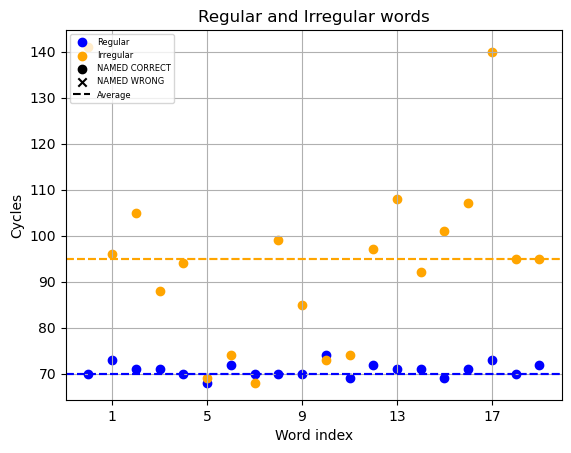

In [10]:
print(f"Regular avg.   {regular_results.avg_cycle}")
print(f"Irregular avg. {irregular_results.avg_cycle}")

ResultSet.plot_cycles_comparison(
    results=[regular_results, irregular_results],
    legends=["Regular", "Irregular"],
    title="Regular and Irregular words"
)

The regular words exhibit a high degree of similarity in terms of cycles, each aligning with the average of 70. In contrast, the irregular words display a more dispersed distribution, averaging around 95 cycles. This suggests a generally greater difficulty in reading irregular words as compared to their regular counterparts.

There is evidence of certain irregular words that behave similarly to regular ones in terms of cycles.

In [11]:
[result.word for result in irregular_results if result.cycles < 80]

['lure', 'lute', 'pour', 'sans', 'sues']

Additionally, there are two irregular words that prove to be notably challenging to read.

In [12]:
[result.word for result in irregular_results if result.cycles > 130]

['bury', 'wily']

### Activations

We create a plot illustrating the distinct activations of each word in the two sets.

**Regular** activations.

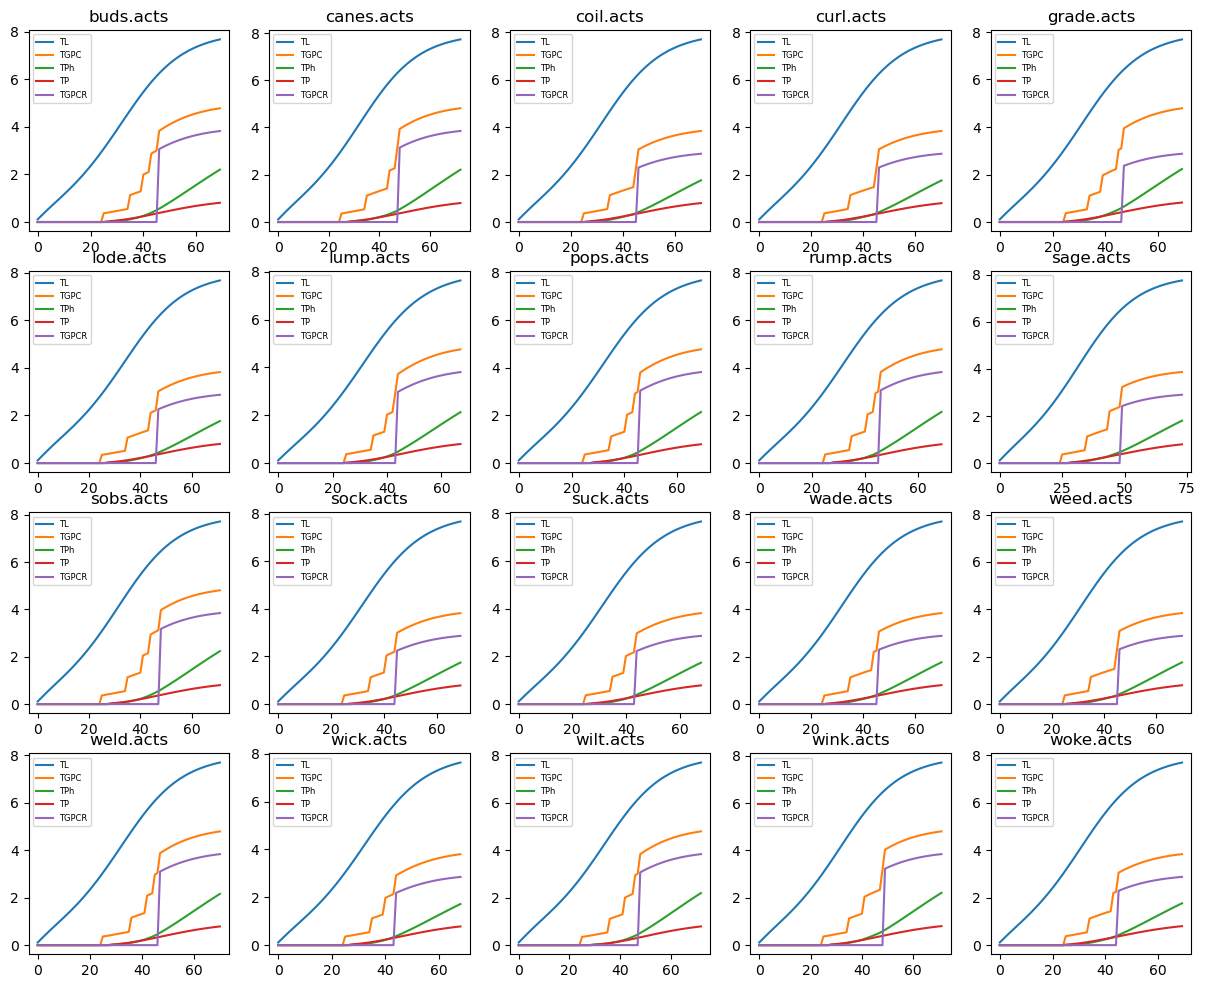

In [13]:
regular_activations.plot_multiple(nrows=4)

**Irregular** activations.

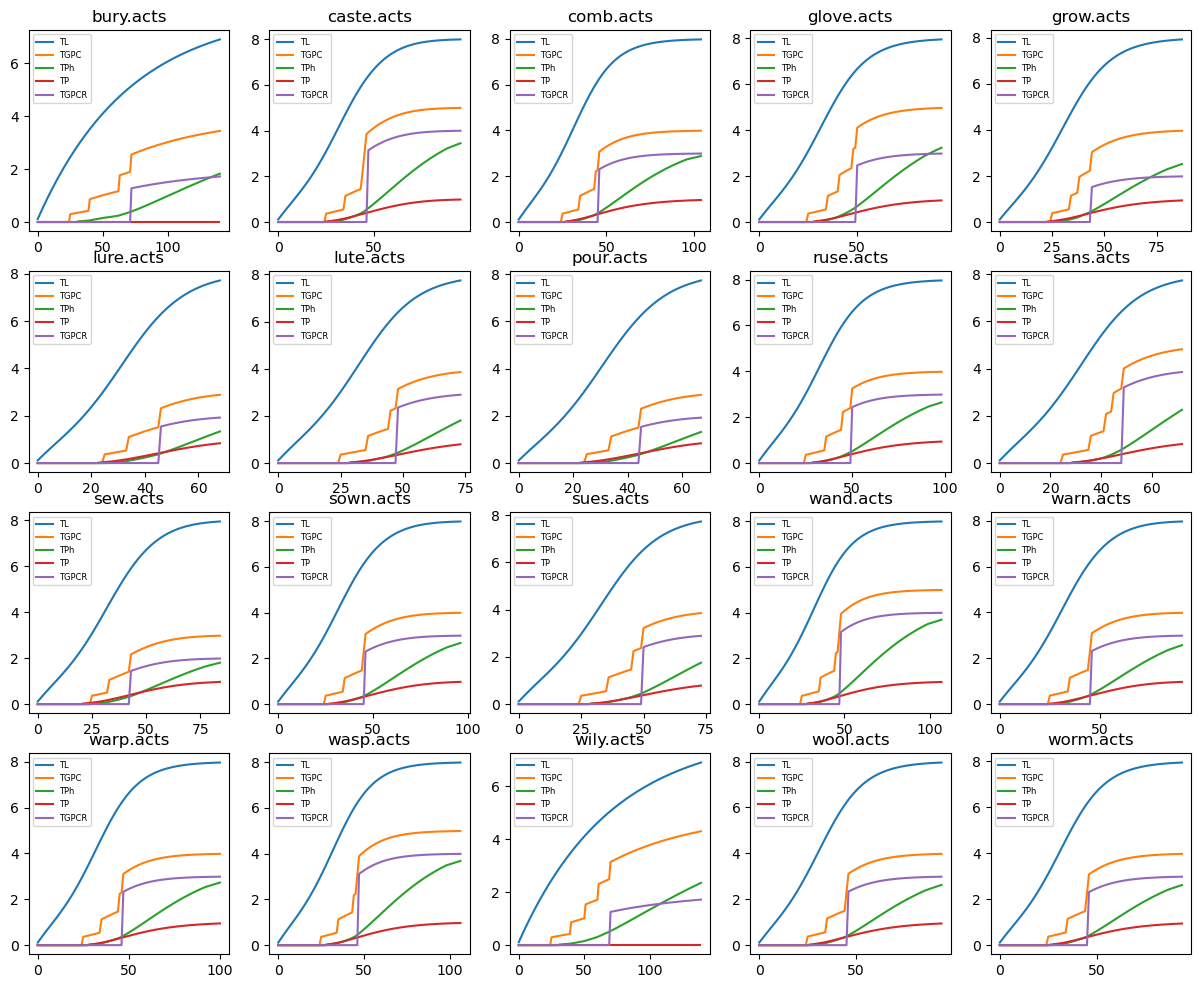

In [14]:
irregular_activations.plot_multiple(nrows=4)

The activations align with the patterns observed in the cycles. While the activations for regular words are notably similar, some variations exist among the irregular ones. To emphasize these differences, let's focus on one example from each set, choosing the words closest to the average behavior in terms of cycles.

In [15]:
def get_avg_cycle_word(results):
    return next(iter([
        result for result in results
        if result.cycles == median(r.cycles for r in results)
    ]))

In [16]:
avg_regular   = get_avg_cycle_word(results=regular_results)
avg_irregular = get_avg_cycle_word(results=irregular_results)

print(f"Avg regular:   {avg_regular.word} (Cycles: {avg_regular.cycles})")
print(f"Avg irregular: {avg_irregular.word} (Cycles: {avg_irregular.cycles})")

Avg regular:   coil (Cycles: 71)
Avg irregular: wool (Cycles: 95)


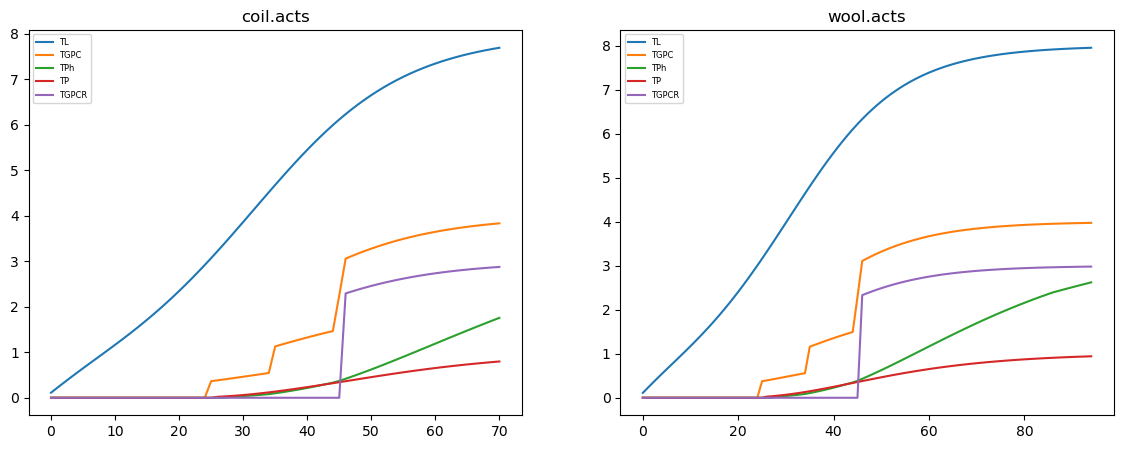

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

regular_activations.  plot(file_name=f"{avg_regular.word}.acts",   ax=axes[0])
irregular_activations.plot(file_name=f"{avg_irregular.word}.acts", ax=axes[1])

The increase in phonological activation `TPh` for the irregular word compared to the regular one aligns with the hypothesis. This difference in activation suggests that the irregular word relies more on the second route, which involves examining each grapheme individually. As a result the irregular word takes more cycles.

### Model parameters

The earlier findings indicate that the orthlex-phonlex interaction is a crucial aspect of processing the two types of words. We now examine the parameters of the model involved in this operation (and their defualt value).

In [18]:
for param in [
    Parameter.OrthlexLetterExcitation,
    Parameter.OrthlexPhonlexExcitation,
    Parameter.PhonlexOrthlexExcitation
]:
    print(f"{param} default: {param.default}")

OrthlexLetterExcitation default: 0.3
OrthlexPhonlexExcitation default: 0.25
PhonlexOrthlexExcitation default: 0.25


We will initially explore the behavior of the two example words by varying the OrthlexPhonlexExcitation parameter.

The **regular** word.

Running: ./drc --nofiles -S OrthlexPhonlexExcitation 0.1 0.9 10 coil


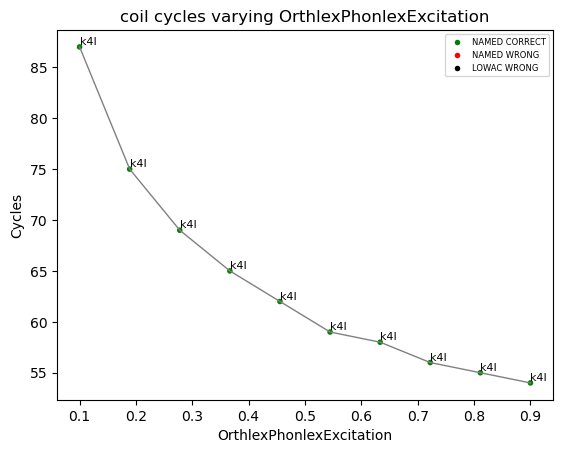

In [19]:
drc.run(
    word=avg_regular.word,
    parameters=[(Parameter.OrthlexPhonlexExcitation, (0.10, 0.90, 10))]
).plot_cycles()

The **irregular** word.

Running: ./drc --nofiles -S OrthlexLetterExcitation 0.1 0.9 10 wool


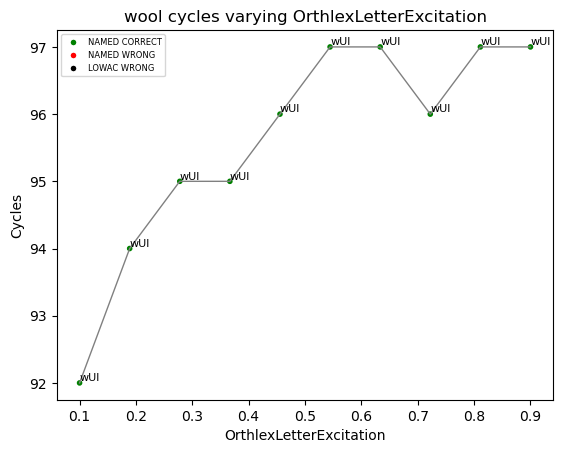

In [20]:
drc.run(
    word=avg_irregular.word,
    parameters=[(Parameter.OrthlexLetterExcitation, (0.10, 0.90, 10))]
).plot_cycles()

The trends observed for the same parameter values exhibit two opposite patterns, underscoring the different nature of the words: as the excitation increase the problem becomes easier for regular words, while harder for irregular ones. It is also crucial to emphasize the different scale of variation of the two. For regular words, contributing to a notable improvement of 30 cycles, while relatively modest for irregular words, resulting in only a 5-cycle slowdown.

### Running DRC with new parameters

We try to enhance the regularity by strengthening the connection responsible for the entire word processing.

In [21]:
parameters_regularity = [
    (Parameter.OrthlexLetterExcitation, 0.5),
    (Parameter.OrthlexPhonlexExcitation, 0.5),
    (Parameter.PhonlexOrthlexExcitation, 0.5)
]

regular_results_reg   = drc.run(word=regular_file,   parameters=parameters_regularity)
irregular_results_reg = drc.run(word=irregular_file, parameters=parameters_regularity)

Running: ./drc --nofiles -P OrthlexLetterExcitation 0.5 -P OrthlexPhonlexExcitation 0.5 -P PhonlexOrthlexExcitation 0.5 -b regular.txt
Running: ./drc --nofiles -P OrthlexLetterExcitation 0.5 -P OrthlexPhonlexExcitation 0.5 -P PhonlexOrthlexExcitation 0.5 -b irregular.txt


Conversely we make these connection weaker to indirectly help the single grapheme conversion.

In [22]:
parameters_irregularity = [
    (Parameter.OrthlexLetterExcitation, 0.1),
    (Parameter.OrthlexPhonlexExcitation, 0.1),
    (Parameter.PhonlexOrthlexExcitation, 0.1)
]
regular_results_irreg   = drc.run(word=regular_file, parameters=parameters_irregularity)
irregular_results_irreg = drc.run(word=irregular_file, parameters=parameters_irregularity)

Running: ./drc --nofiles -P OrthlexLetterExcitation 0.1 -P OrthlexPhonlexExcitation 0.1 -P PhonlexOrthlexExcitation 0.1 -b regular.txt
Running: ./drc --nofiles -P OrthlexLetterExcitation 0.1 -P OrthlexPhonlexExcitation 0.1 -P PhonlexOrthlexExcitation 0.1 -b irregular.txt


We plot the cycles in the three cases for a visual comparison.

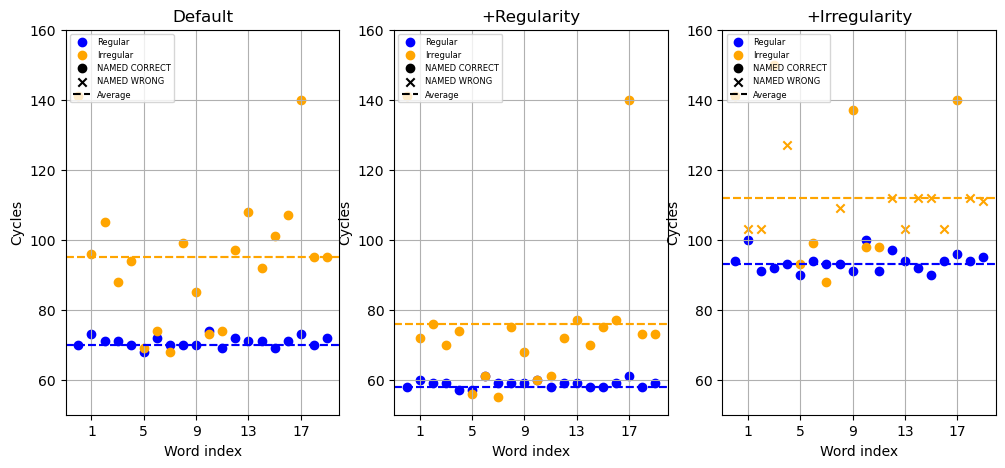

In [23]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

results = [
    (regular_results,       irregular_results),
    (regular_results_reg,   irregular_results_reg),
    (regular_results_irreg, irregular_results_irreg)
]

for i, (result, title) in enumerate(zip(results, ["Default", "+Regularity", "+Irregularity"])):
    
    regular, irregular = result
    
    ResultSet.plot_cycles_comparison(
        results=[regular, irregular],
        legends=["Regular", "Irregular"],
        title=title,
        yrange=(50, 160),
        ax=axes[i]
    )

Indeed, as anticipated, adjusting the influence of the orthographic-to-phonological connection plays a fundamental role in determining the decoding speed of regular words. This modification naturally has implication both to time required for processing irregular words. 

## Exercise 2

### Instructions

The pseudo-homophone effect consists in the fact that nonwords that are homophonic to real words (e.g., *brane*, *brees*) are read faster than otherwise comparable control nonwords (e.g., *clafe*, *kraaf*; e.g., McCann and Besner, 1987; Taft and Russell, 1992). Try and see whether the DRC is able to simulate the effect (use `nonwordPseudohomophone.txt` `andnonwordNonPseudohomophones.txt`). Why does this effect arise? Illustrate with reference to the activation dynamics.

### DRC for Pseudo-homophone words and not

The first route of the model that uses the word in its entirety is expected to read pseudo-homophone words faster, since these words should in a way resemble those in the vocabulary. In contrast, non-pseudohomophonic words are likely to engage most the GPC route, which typically requires more time for processing. Examining the activation levels of parameters such as ,, will offer valuable insights into this effect.

### Reading words

In [26]:
ph_words, ph_file = words.non_words_pseudohomophone

print_list(l=ph_words, title="Pseuodohomophone")

Pseuodohomophone
- brane
- milc
- gole
- gaim
- whele
- poast
- moov
- rayne
- traid
- tode
- rume
- maik
- hed
- groope
- keap
- stawk
- blak
- hoam
- blud
- fite
- blo
- treet
- hye
- cawl
- shaip
- larst
- lej
- berd
- cair
- croo
Tot: 30


In [27]:
words_to_txt_file(words=ph_words, file_path=path.join(DRC_DIR, ph_file))

Content successfully written to C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\nonwordPseudohomophone.txt


In [28]:
nph_words, nph_file = words.non_words_non_pseudohomophone

print_list(l=nph_words, title="Non Pseuodohomophone")

Non Pseuodohomophone
- prane
- filc
- jole
- raim
- chele
- woast
- troov
- hayne
- chaid
- fode
- yume
- paik
- gled
- noope
- meap
- rawk
- plak
- voam
- slud
- pite
- clo
- smeet
- kye
- dawl
- laip
- darst
- bej
- lerd
- sair
- snoo
Tot: 30


In [29]:
words_to_txt_file(words=nph_words, file_path=path.join(DRC_DIR, nph_file))

Content successfully written to C:\Users\user.LAPTOP-G27BJ7JO\Documents\GitHub\LRB_project\assignment2\drc\nonwordNonePseudohomophone.txt


### Running DRC

We run the default version of DRC network on the two types of words, storing their activations.

**Pseudo-homophone** execution.

In [30]:
ph_results, ph_activations = drc.run(
    word=ph_file,
    store_activations=True
)

Running: ./drc -a -b nonwordPseudohomophone.txt


In [31]:
nph_results, nph_activations = drc.run(
    word=nph_file,
    store_activations=True
)

Running: ./drc -a -b nonwordNonePseudohomophone.txt


### Cycles

Let's examine and compare the number of cycles for each of the two families of words.

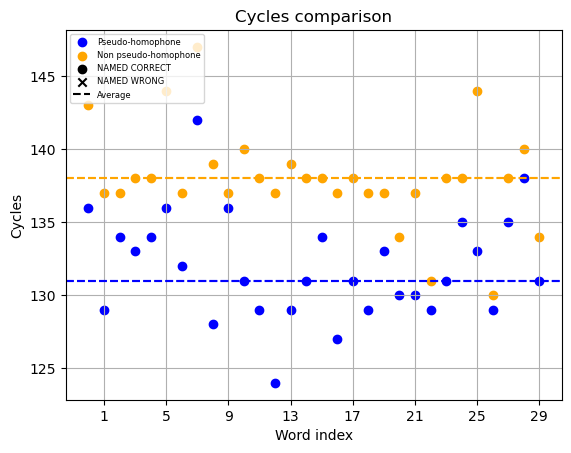

In [32]:
ResultSet.plot_cycles_comparison(
    results=[ph_results,nph_results],
    legends=["Pseudo-homophone","Non pseudo-homophone"]
)

There is evidence supporting the idea that pseudo-homophone words are generally easier to read, leveraging the benefits of the lexical route. However, interestingly, there are exceptions: two non-pseudo-homophone words are easier to read than the average for pseudo-homophones, and conversely, one pseudo-homophone word is more challenging than the average for non-pseudo-homophones. Let's examine these exceptions.

In [33]:
[r.word for r in ph_results if r.cycles > 138]

['rayne']

In [34]:
[r.word for r in nph_results if r.cycles < 132]

['kye', 'bej']

### Activations

We create a plot illustrating the distinct activations of each word in the two sets.

**Pseudo-homophone** activations.

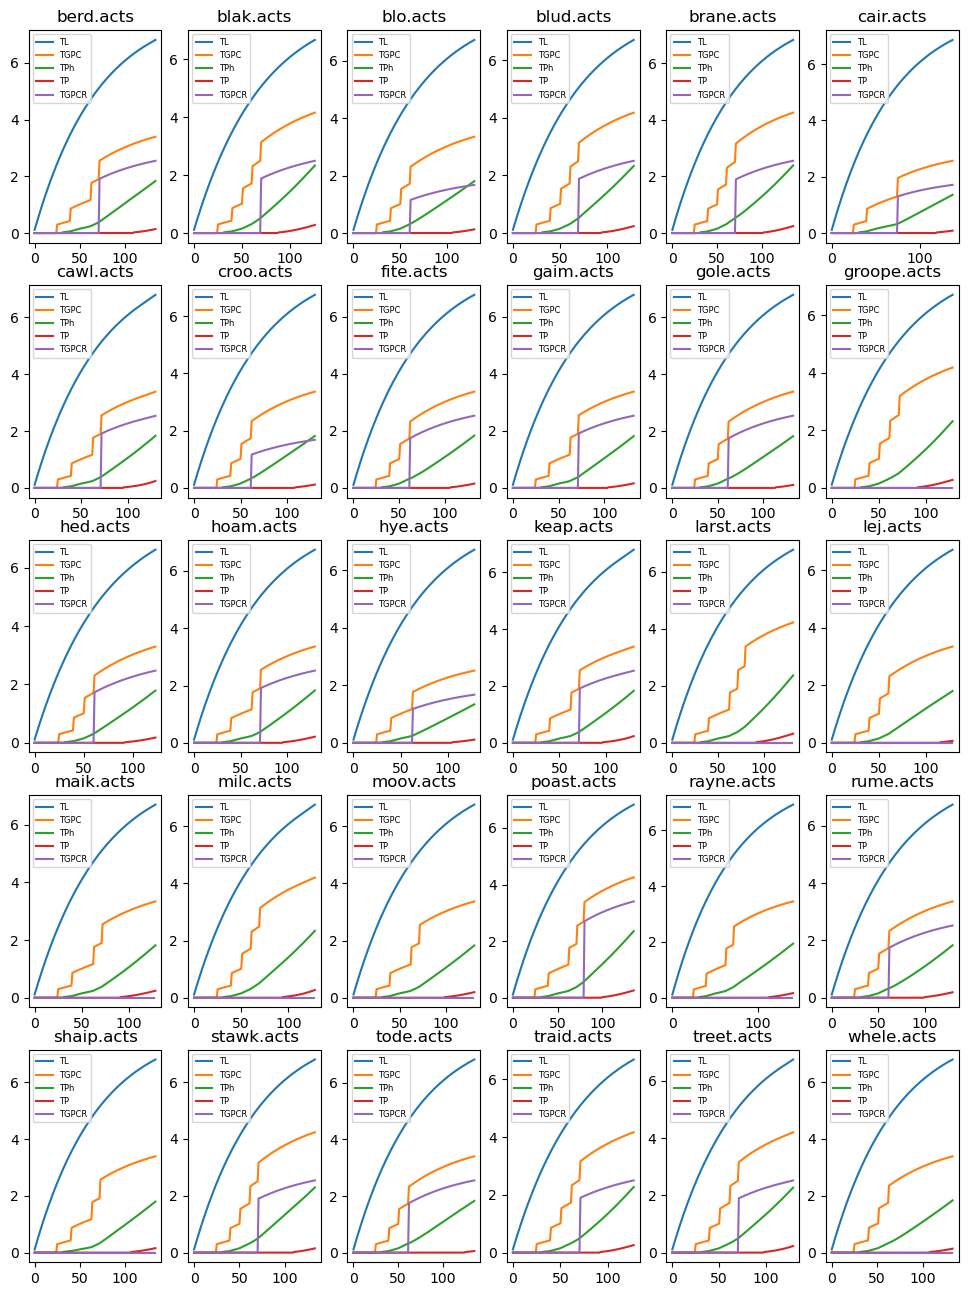

In [35]:
ph_activations.plot_multiple(nrows=5, figsize=(12, 16))

**Non Pseudo-homophone** activations.

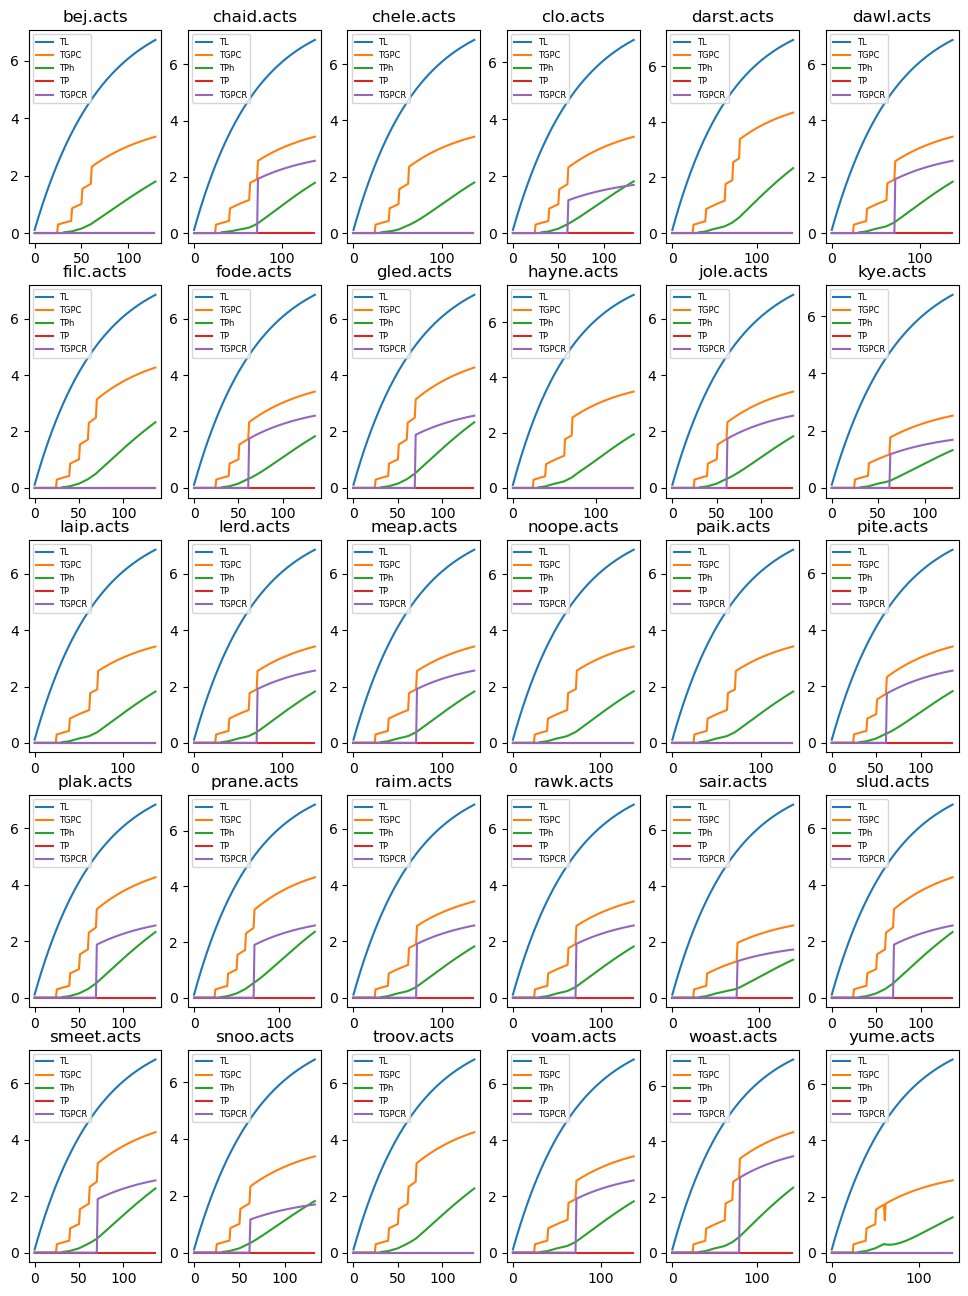

In [36]:
nph_activations.plot_multiple(nrows=5, figsize=(12, 16))


There are distinct patterns within both sets.In order to address which leads to a faster reading in the two cases we replot them in the order indicated by the number of cycles.

To synthesize and highlight these patterns, let's consider representative instances from each set.

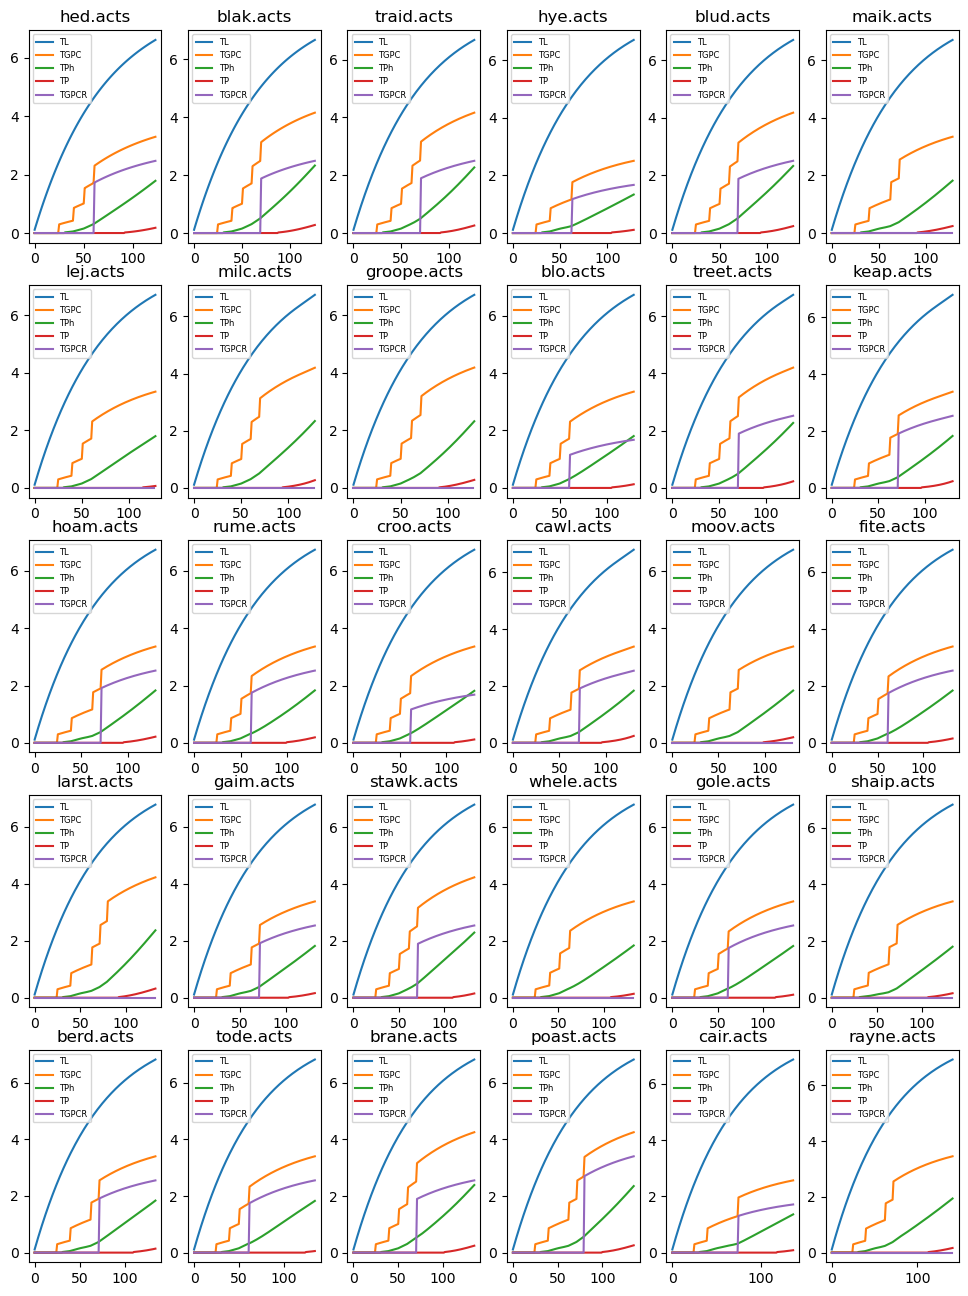

In [37]:
ph_activations.plot_multiple(nrows=5, figsize=(12, 16), 
                             order=list(np.argsort([ph_results[a[:-5]].cycles for a in ph_activations])))

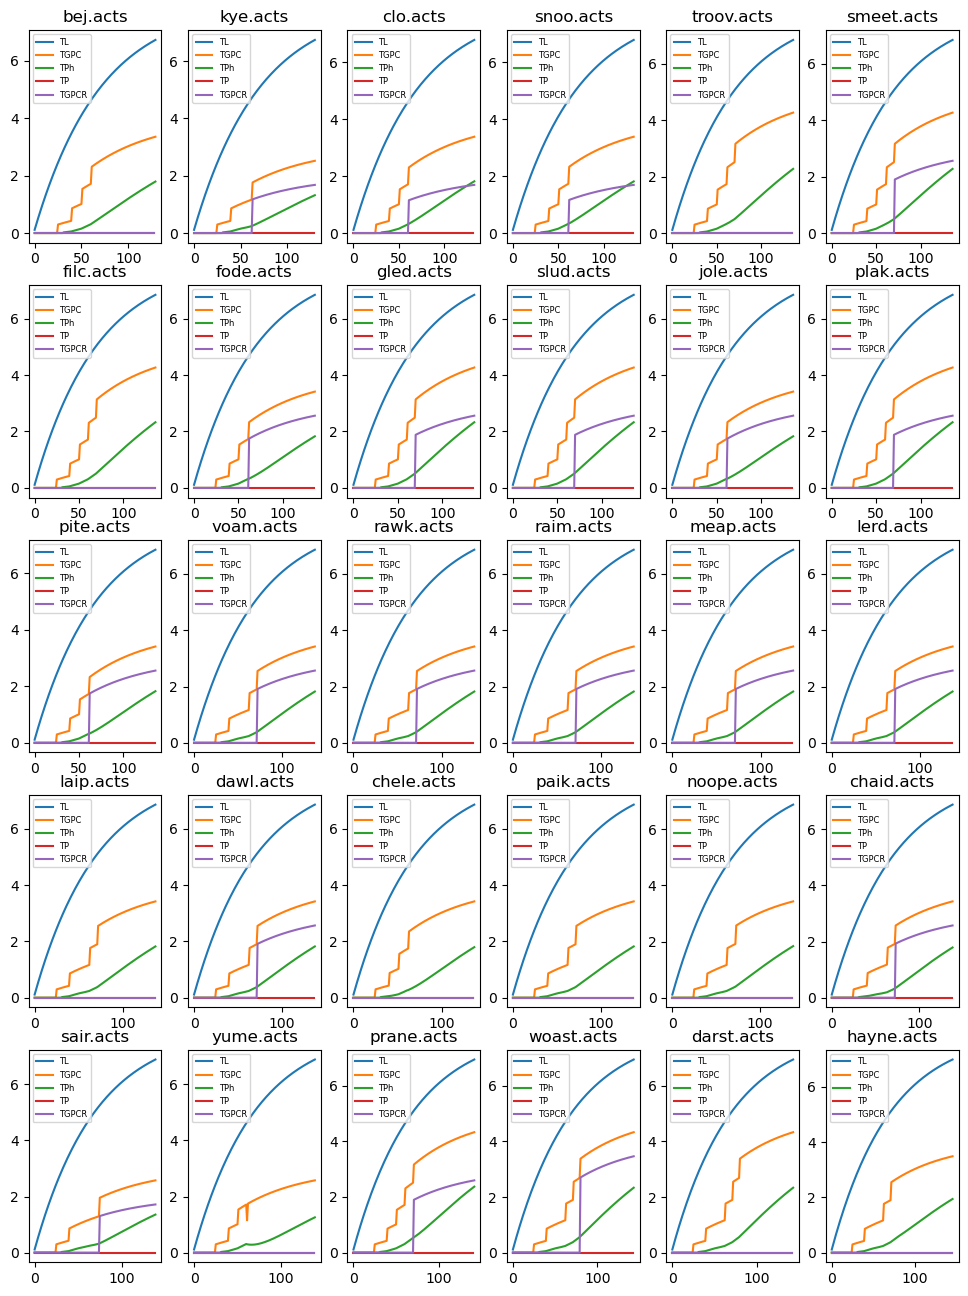

In [38]:
nph_activations.plot_multiple(nrows=5, figsize=(12, 16), 
                             order=list(np.argsort([nph_results[a[:-5]].cycles for a in nph_activations])))

Two distinct patterns observed in both types of words involve the `TGPC` and `TGPCR` activations. In the case of the first, there is a step-increasing trend, reaching various levels; the latter is occasionally silent. Interestingly, the interaction between these activations in both classes doesn't significantly highlight their impact on the final number of cycles.

The critical difference between the two classes is consistently observed in the pseudo-homophone, where there is a small, but consistent, increase in `TP` activations during the final cycles. This consistent variation sets pseudo-homophones apart from their non-pseudo-homophone counterparts and likely contributes to the observed differences in reading dynamics between the two classes which as hypothesized involves the phonological in the lexical route.

## Exercise 3

### Instructions

A brain injured patient is diagnosed with Surface Dyslexia when se/he’s better at reading regular words (`regular.txt`) and nonwords(`nonwordsNonPseudohomophones.txt`), as compared to irregular words(`irregular.txt`; e.g., Patterson, Marshall and Coltheart, 1985). How would you simulate such a patient with the DRC? Is there only one way to do so? If not,describe two different damages to the system that would generate the impairment, and illustrate their (different) behaviour.

### Reading words

In [39]:
print_list(l=regular_words, title="Regular words")

Regular words
- buds
- canes
- coil
- curl
- grade
- lump
- lode
- pops
- rump
- sock
- sage
- suck
- sobs
- wade
- weed
- wick
- weld
- wilt
- woke
- wink
Tot: 20


In [40]:
print_list(l=ph_words, title="Pseudo-homophone words")

Pseudo-homophone words
- brane
- milc
- gole
- gaim
- whele
- poast
- moov
- rayne
- traid
- tode
- rume
- maik
- hed
- groope
- keap
- stawk
- blak
- hoam
- blud
- fite
- blo
- treet
- hye
- cawl
- shaip
- larst
- lej
- berd
- cair
- croo
Tot: 30


In [41]:
print_list(l=irregular_words, title="Irregular words")

Irregular words
- bury
- caste
- comb
- grow
- glove
- lure
- lute
- pour
- ruse
- sew
- sans
- sues
- sown
- wand
- warn
- warp
- wasp
- wily
- wool
- worm
Tot: 20


### Default DRC

We start with the default DRC network.

In [42]:
regular_results   = drc.run(word=regular_file)
ph_results        = drc.run(word=ph_file)
irregular_results = drc.run(word=irregular_file)

Running: ./drc --nofiles -b regular.txt
Running: ./drc --nofiles -b nonwordPseudohomophone.txt
Running: ./drc --nofiles -b irregular.txt


Regular avg.          70
Irregular avg.        95
Pseudo homophone avg. 131


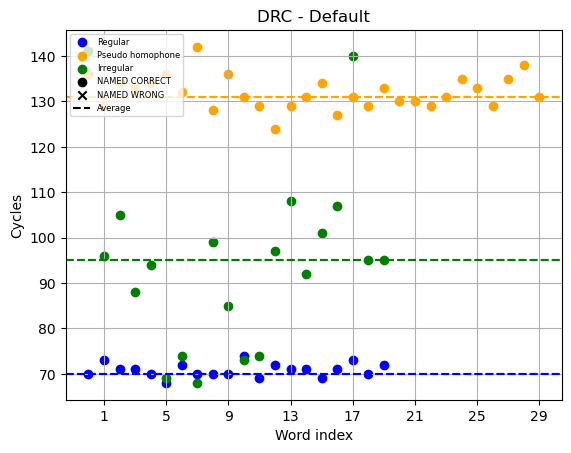

In [37]:
print(f"Regular avg.          {regular_results.avg_cycle}")
print(f"Irregular avg.        {irregular_results.avg_cycle}")
print(f"Pseudo homophone avg. {ph_results.avg_cycle}")

ResultSet.plot_cycles_comparison(
    results=[regular_results, ph_results, irregular_results],
    legends=["Regular", "Pseudo homophone", "Irregular"],
    title="DRC - Default"
)

In the default network, a clear pattern emerges across three distinct cases: regular words are processed relatively fast, necessitating an average of 70 cycles; irregular words demand a bit more time, averaging 95 cycles; pseudo-homophonic non-words exhibit the longest processing time of around 131 cycles average.

### Case 1

By reducing the excitation for orthographic-to-letter and orthographic-to-phoneme processing, the model is expected to have a diminished sensitivity to visual features when recognizing letters within words and to visual word form when looking for the correponding phonological representation. This reduction in sensitivity may lead to less efficient processing of visual features and potentially make the lexical pathway for recognizing irregular words not work properly.

In [45]:
parameter_case1 = [
    (Parameter.OrthlexLetterExcitation, 0.00), 
    (Parameter.OrthlexPhonlexExcitation, 0.00)
]

regular_results_case1   = drc.run(word=regular_file,   parameters=parameter_case1)
ph_results_case1        = drc.run(word=ph_file,        parameters=parameter_case1)
irregular_results_case1 = drc.run(word=irregular_file, parameters=parameter_case1)

Running: ./drc --nofiles -P OrthlexLetterExcitation 0.0 -P OrthlexPhonlexExcitation 0.0 -b regular.txt
Running: ./drc --nofiles -P OrthlexLetterExcitation 0.0 -P OrthlexPhonlexExcitation 0.0 -b nonwordPseudohomophone.txt
Running: ./drc --nofiles -P OrthlexLetterExcitation 0.0 -P OrthlexPhonlexExcitation 0.0 -b irregular.txt


In [ ]:
print(f"Regular avg.          {regular_results_case1.avg_cycle}")
print(f"Irregular avg.        {irregular_results_case1.avg_cycle}")
print(f"Pseudo homophone avg. {ph_results_case1.avg_cycle}")

ResultSet.plot_cycles_comparison(
    results=[regular_results_case1, ph_results_case1, irregular_results_case1],
    legends=["Regular", "Pseudo homophone", "Irregular"],
    title="DRC - Defualt"
)

### Case 2

In [64]:
parameter_case2 =  [
    (Parameter.OrthlexLetterExcitation, 0.005), 
    (Parameter.OrthlexPhonlexExcitation, 0.002)
]

regular_results_case2   = drc.run(word=regular_file,   parameters=parameter_case2)
ph_results_case2        = drc.run(word=ph_file,        parameters=parameter_case2)
irregular_results_case2 = drc.run(word=irregular_file, parameters=parameter_case2)

Running: ./drc --nofiles -P OrthlexLetterInhibition 1.9 -P OrthlexPhonlexInhibition 1.9 -b regular.txt


ValueError: 'Results:' is not in list

Regular avg.          70
Irregular avg.        94
Pseudo homophone avg. 131


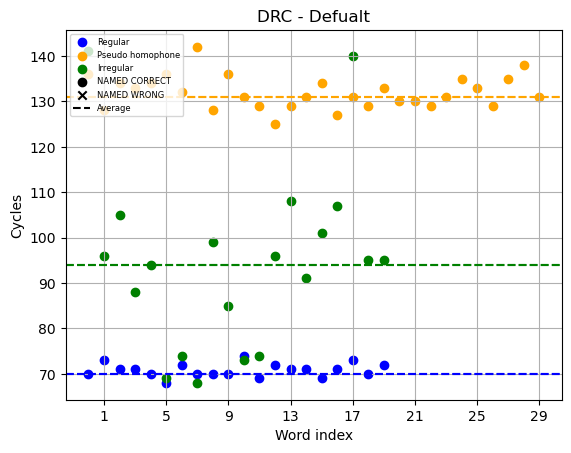

In [65]:
print(f"Regular avg.          {regular_results_case2.avg_cycle}")
print(f"Irregular avg.        {irregular_results_case2.avg_cycle}")
print(f"Pseudo homophone avg. {ph_results_case2.avg_cycle}")

ResultSet.plot_cycles_comparison(
    results=[regular_results_case2, ph_results_case2, irregular_results_case2],
    legends=["Regular", "Pseudo homophone", "Irregular"],
    title="DRC - Defualt"
)